In [8]:
%load_ext autoreload
%autoreload 2

In [1]:
from modules import get_data
import pandas as pd
from custom_pipeline import *

In [2]:
X, y, train_data, proc_test_data, test_data = get_data()

accuracy = 0.78718904493211


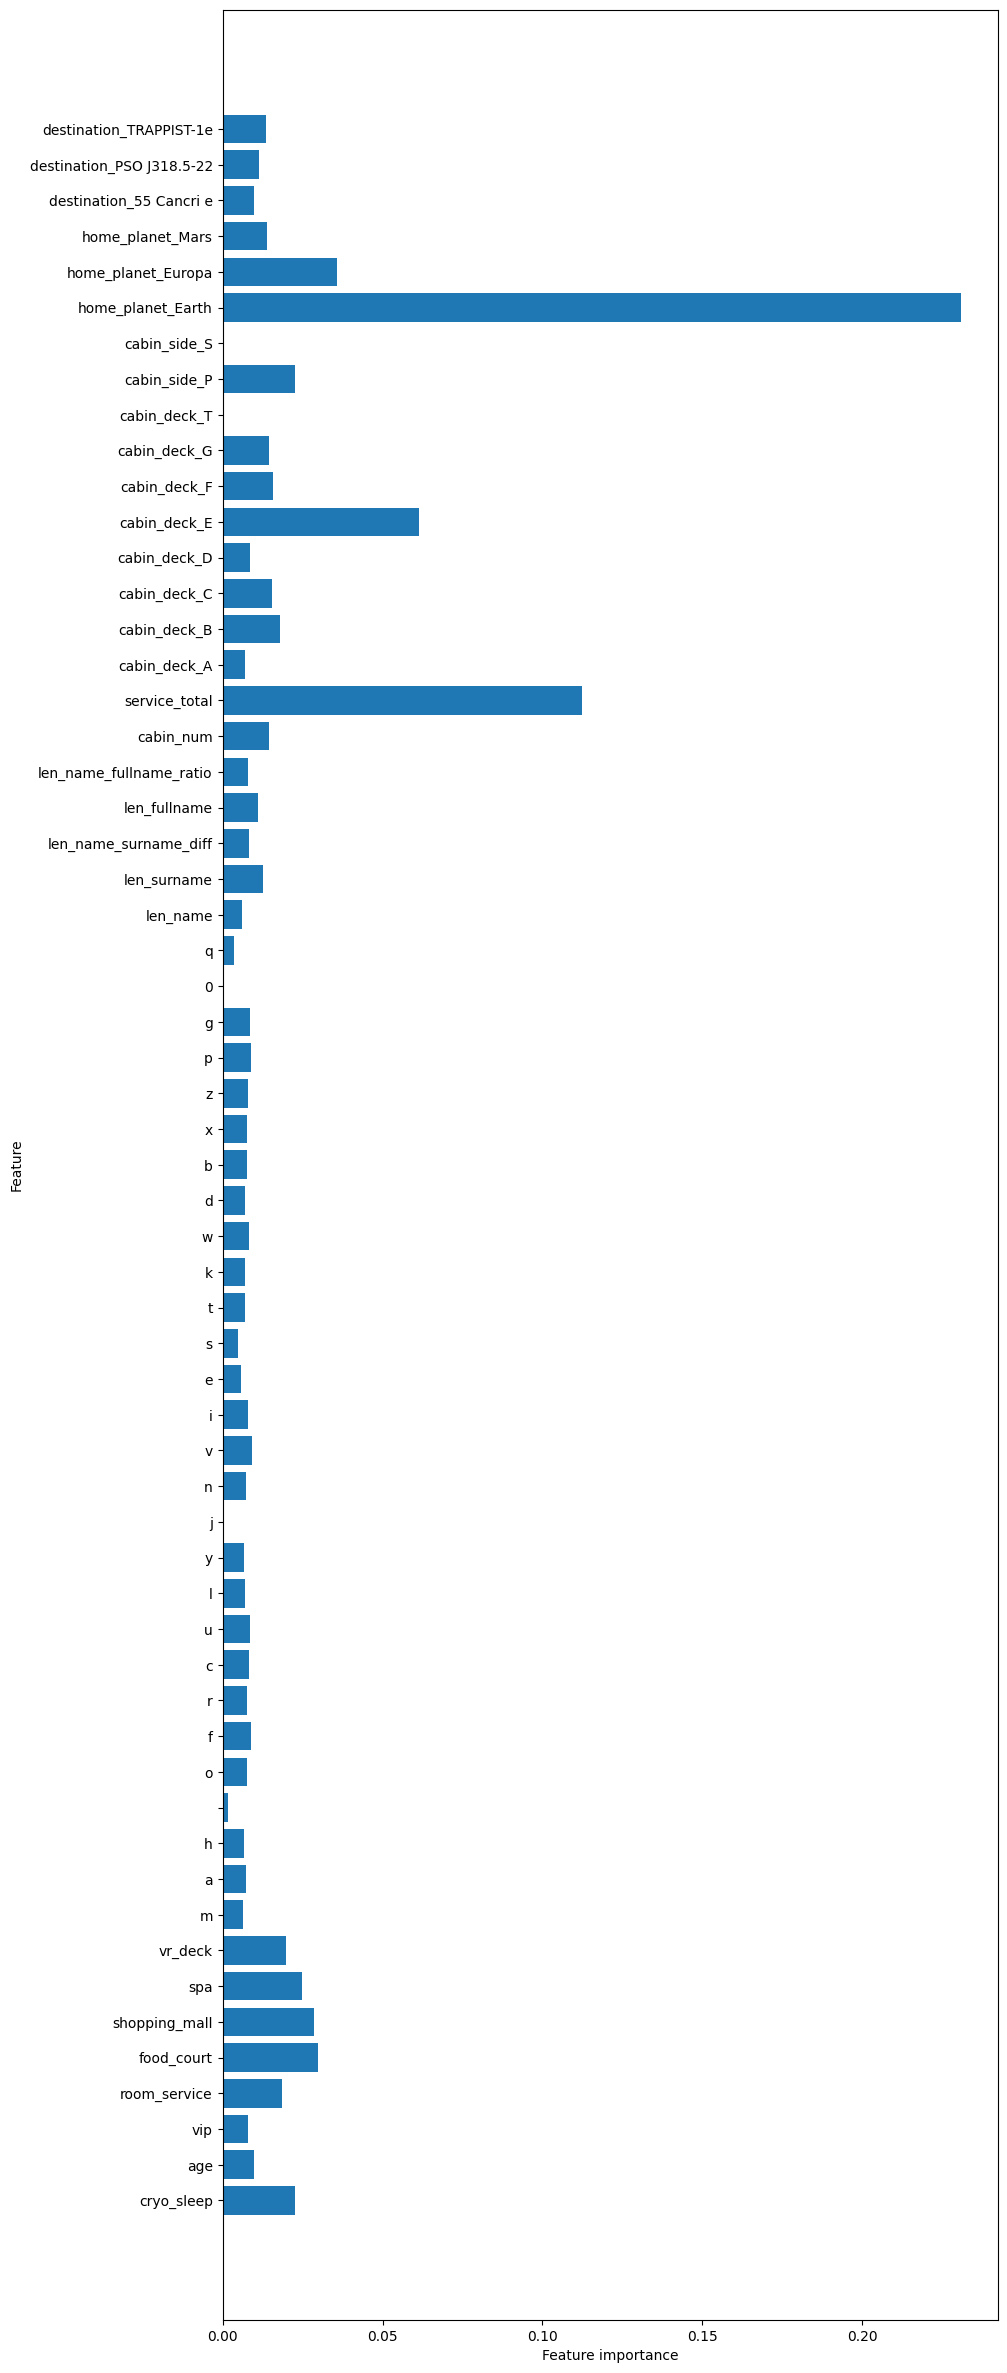

In [3]:
# Boosted Trees
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(learning_rate=0.02, max_depth=6, n_estimators=700, n_jobs=-1)

model.fit(X, y)

y_pred = model.predict(proc_test_data)

# cross validation
print(f"accuracy = {cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean()}")


# feature importance
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(model)

# feature selection
# from sklearn.feature_selection import SelectFromModel

# sfm = SelectFromModel(model, threshold=0.1)
# sfm.fit(X, y)

# for feature_list_index in sfm.get_support(indices=True):
#     print(X.columns[feature_list_index])

In [4]:
y_pred = model.predict(proc_test_data)
y_pred = y_pred.astype(bool)
ids = test_data['PassengerId']
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
submission.to_csv('submission_14.csv', index=False)

In [15]:
X.isna().sum()

cryo_sleep                     0
age                            0
vip                            0
room_service                   0
food_court                     0
shopping_mall                  0
spa                            0
vr_deck                        0
m                              0
a                              0
h                              0
                               0
o                              0
f                              0
r                              0
c                              0
u                              0
l                              0
y                              0
j                              0
n                              0
v                              0
i                              0
e                              0
s                              0
t                              0
k                              0
w                              0
d                              0
b                              0
x         